# SIFT Algorithm 
<span style='color:Blue'> Author  : Vahid Omrani </span>

# <span style='color:Blue'> Import Libraries </span>

In [175]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import copy

<class 'numpy.ndarray'>

      size image :  147744
    shape imgage :  (432, 342)
   rows of image :  432
columns of image :  342


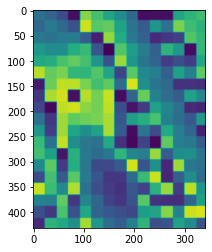

In [178]:
#image = cv2.imread('107.jpg',0)
image = cv2.imread('tumor.png',0)
#image = cv2.imread('chess.jpg',0)
row,col = np.shape(image)

#image = cv2.imread('tumor.png')
#row,col,channel = np.shape(image)  # if image with 3 channel,RGB

print(type(image))
print('\n      size image : ',np.size(image))
print('    shape imgage : ',np.shape(image))
print('   rows of image : ',row)
print('columns of image : ', col)
plt.imshow(image)


# <span style='color:Blue'>Set the Parameters of the Algorithm </span> 

In [179]:

num_Octaves = 3                     # Octaves : Number of scales
num_Levels = 3                      # Levels  : Number of Image in each scales 
sigma0 = np.sqrt(2)                 # simga 0 : Initial sigma
num_Stacks = num_Levels + 3         # Stacks  : Number of Images in each scales 3 are addes by SIFT Algorithm 
k = np.power(2,(1/num_Levels))      # Variable of SIFT Algorithm (scale factor )


Space_Scale = [[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
#Space_Scale = np.zeros((num_Octaves,num_Stacks)).tolist()


# <span style='color:Blue'>Step 1 : Scale Space</span> 


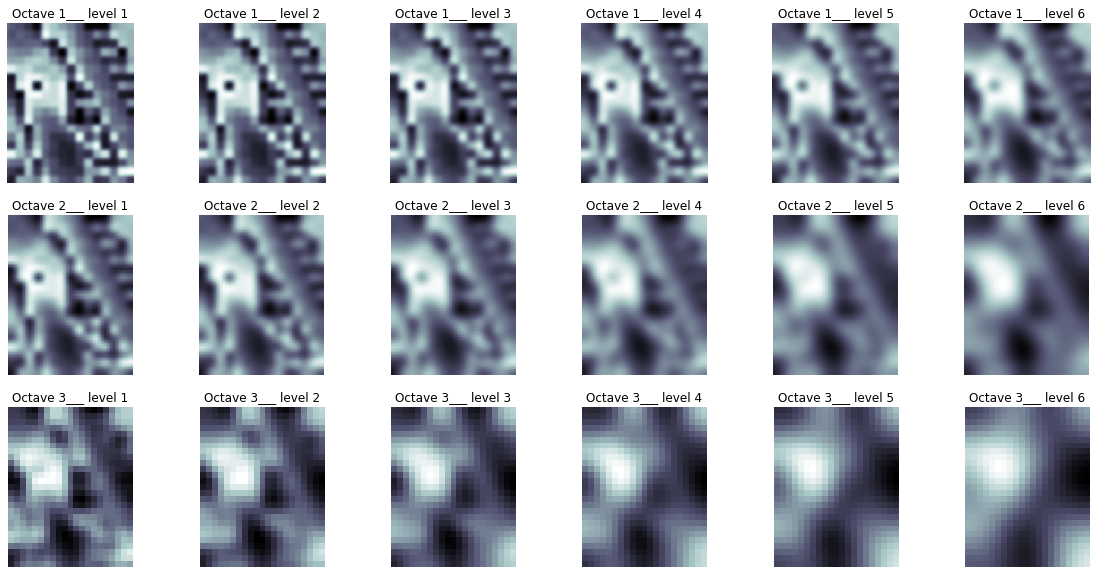

In [185]:
%matplotlib inline

sigma = np.zeros((num_Octaves,num_Stacks))
List_image = (np.zeros((num_Octaves,num_Stacks))).tolist()
Sigma_Octaves = []
Sigma_Stacks_Level = []

for octave in range(num_Octaves):
    sigma_Oct = sigma0 * np.power(2,octave)
    Sigma_Octaves.append(sigma_Oct)
    Size_Octaves = 2**(-(octave))
    image_Otaves = cv2.resize(image, (int(row * Size_Octaves), int(col * Size_Octaves)))
    for level in range(num_Stacks):
#        SSL = sigma_Oct * np.power(2,(j-1))   # L-2 , L = 1,2,3,...  and j-1 , j = 0,1,2,...
        SSL = Sigma_Octaves[octave] * (k ** (level-1))   # L-2 , L = 1,2,3,...  and j-1 , j = 0,1,2,...
        Sigma_Stacks_Level.append(SSL)
        List_image[octave][level] = gaussian_filter(image_Otaves, sigma=Sigma_Stacks_Level[level])
#np.reshape(Sigma_Stacks_Level,(3,6))


index = 1
fig = plt.figure(figsize=(20, 10))

for i in range(num_Octaves):
    for j in range(num_Stacks):
        fig.add_subplot(3, 6, index)
        plt.imshow(List_image[i][j],cmap=plt.cm.bone)
        plt.title('Octave ' + str(i+1) + '___ level ' + str(j+1) )
        plt.axis('off')
        index+=1
 

# <span style='color:Blue'>Step 2 : DOG _ Diffrence of Gussian </span> 

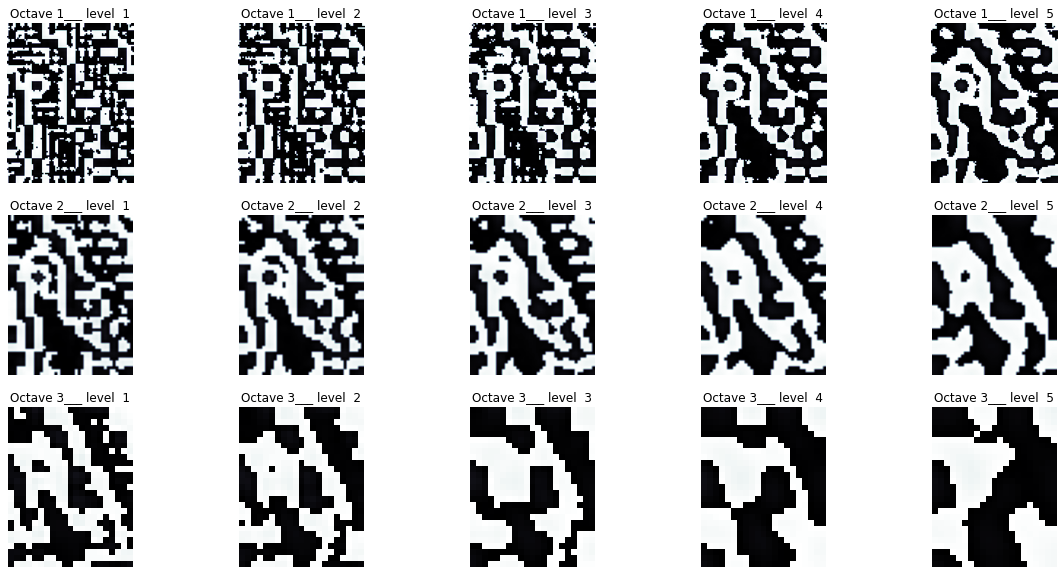

In [187]:
%matplotlib inline

DOG = (np.zeros((num_Octaves,num_Stacks-1))).tolist()
for octave in range(num_Octaves):
    for level in range(num_Stacks-1):    # num of Stacks(levels) 1 unit decrease because diffrence 2 image is 1 image.
        DOG[octave][level] = List_image[octave][level+1] - List_image[octave][level]
        
index = 1
fig = plt.figure(figsize=(20, 10))

for i in range(num_Octaves):
    for j in range(num_Stacks-1):
        fig.add_subplot(3, 5, index)
        plt.imshow(DOG[i][j],cmap=plt.cm.bone)
        plt.title('Octave ' + str(i+1) + '___ level  '+ str(j+1) )
        plt.axis('off')
        index+=1


##### <span style='color:Blue'>create new list for padding image outputs from Diffrence of Gussian </span> 

In [182]:
DOG_pading = copy.deepcopy(DOG)
for octave in range(num_Octaves) :
    for level in range(num_Stacks-1):
        r, c = np.shape(DOG_pading[octave][level])
        array = (DOG_pading[octave][level]) 
        padded_array = np.empty([r+2, c+2], dtype=np.uint8)
        padded_array[:, :] = np.array([0])
        padded_array[1:r+1, 1:c+1] = array

        DOG_pading[octave][level] = padded_array



# <span style='color:Blue'>Step 3 : Extrema Detection </span> 

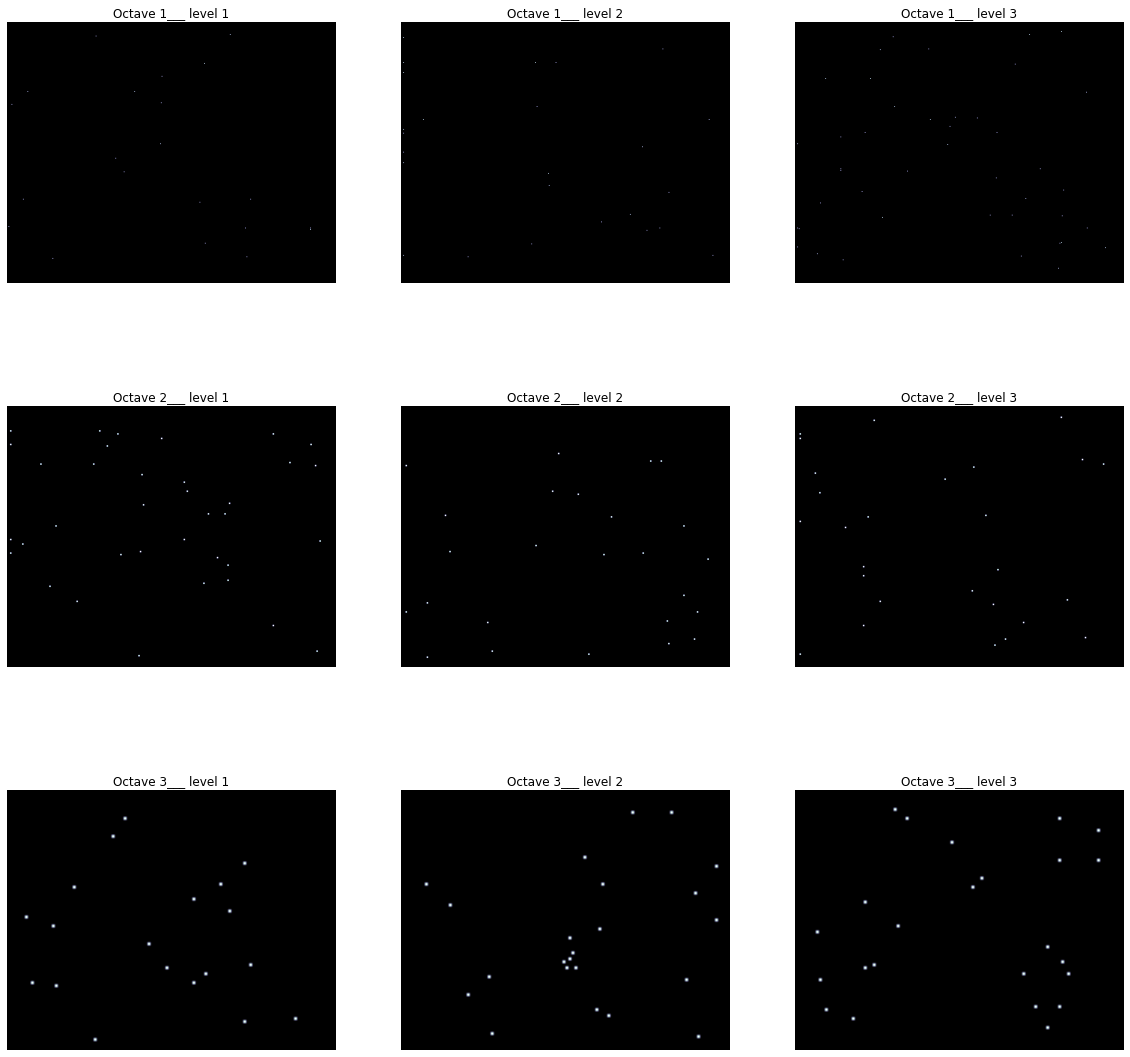

In [183]:

extrema = (np.zeros((num_Octaves,num_Stacks-3))).tolist()

for octave in range(num_Octaves):
    row, col = np.shape(DOG_pading[octave][0])
    
    # num of Stacks(levels) 2 unit decrease because extrema detection between 3 image and output is 1 image in step. 
    for level in range(1,num_Stacks-2):   
        I_up = DOG_pading[octave][level+1]
        I_center = DOG_pading[octave][level]
        I_down = DOG_pading[octave][level-1]
        Extrema_image = copy.deepcopy(I_center)
        Extrema_image = np.array(Extrema_image) * 0
        for i in range(1,row-1):
            for j in range(1,col-1):
                
                Center = I_center[i,j];
                
                A = I_center[i,j+1];
                B = I_center[i+1,j+1];
                C = I_center[i+1,j];
                D = I_center[i+1,j-1];
                E = I_center[i,j-1];
                F = I_center[i-1,j-1];
                G = I_center[i-1,j];
                H = I_center[i-1,j+1];
        
                I = I_up[i,j];
                J = I_up[i,j+1];
                K = I_up[i+1,j+1];
                L = I_up[i+1,j];
                M = I_up[i+1,j-1];
                N = I_up[i,j-1];
                O = I_up[i-1,j-1];
                P = I_up[i-1,j];
                Q = I_up[i-1,j+1];
        
                R = I_down[i,j];
                S = I_down[i,j+1];
                T = I_down[i+1,j+1];
                U = I_down[i+1,j];
                V = I_down[i+1,j-1];
                W = I_down[i,j-1];
                X = I_down[i-1,j-1];
                Y = I_down[i-1,j];
                Z = I_down[i-1,j+1];
        
                Filter = [A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z];
                if all(i < Center for i in Filter):
                    Extrema_image[i][j] = 1
                if all(i > Center for i in Filter):
                    Extrema_image[i][j] = 1
                else:
                    Extrema_image[i][j] = 0
        extrema[octave][level-1] = Extrema_image

%matplotlib inline       
index = 1
fig = plt.figure(figsize=(20, 20))

for i in range(num_Octaves):
    for j in range(num_Stacks-3):
        fig.add_subplot(3, 3, index)
        plt.imshow(extrema[i][j],cmap=plt.cm.bone)
        plt.title('Octave ' + str(i+1) + '___ level ' + str(j+1) )
        plt.axis('off')
        index+=1


# <span style='color:Blue'>Step 4 : Accurate KeyPoints Localization </span> 

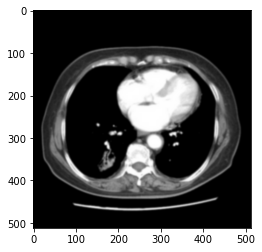

In [313]:
from PIL import Image 
IMG = Image.fromarray(List_image[2][0])
plt.imshow(IMG)
plt.imshow(List_image[0][1])

<class 'numpy.ndarray'>
262144
(512, 512)


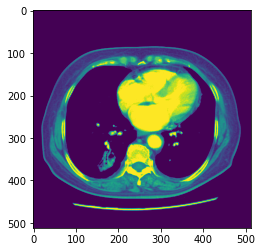

In [371]:
image1 = cv2.imread('107.jpg',0)
print(type(image1))
print(np.size(image1))
print(np.shape(image1))
plt.imshow(image1)